# Project 6 -- Zeru Zhou

**TA Help:** NA


    
**Collaboration:** NA
    
- Get help from Dr. Ward's videos
- Get help from codes in project6 example book

## Question 1

In [2]:
import pandas as pd
dat = pd.read_csv("/depot/datamine/data/whin/190/combined.csv")

In [3]:
import plotly.express as px

def plot_stations(df, *ids):
    df = df.groupby("station_id").head(1).loc[df['station_id'].isin(ids), ('station_id', 'latitude', 'longitude')]
    fig = px.scatter_geo(df, lat="latitude", lon="longitude", scope="usa",
                     hover_name="station_id")
    fig.update_layout(geo = dict(projection_scale=7, center=dict(lat=df['latitude'].iloc[0], lon=df['longitude'].iloc[0])))
    fig.show(renderer="jpg")

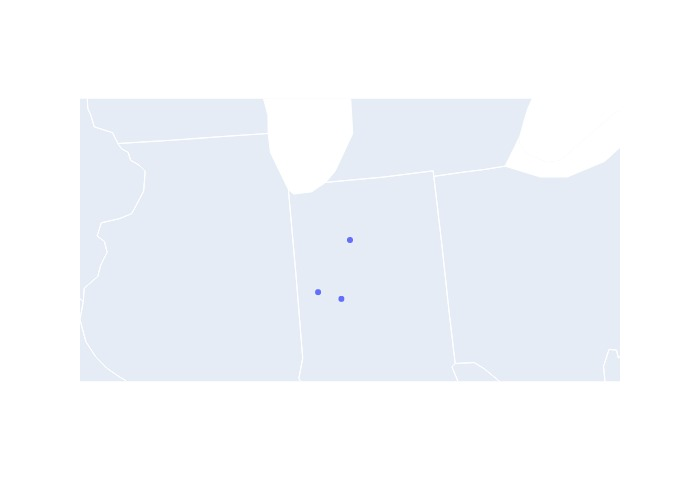

In [16]:
plot_stations(dat, 1,20,175)

In [17]:
Tuple = (1,20,175)

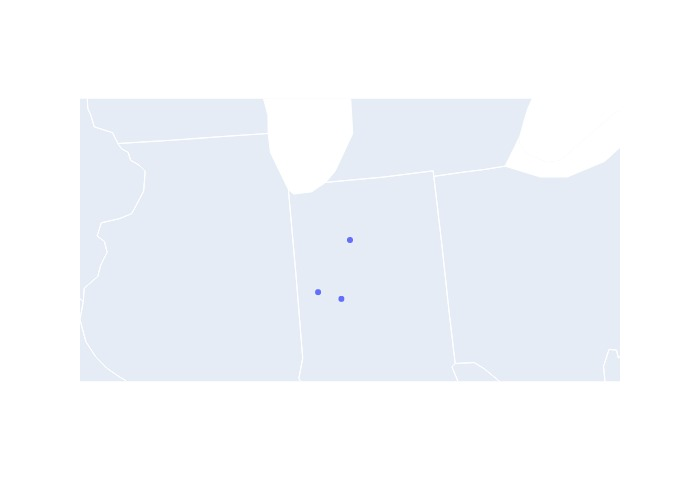

In [19]:
plot_stations(dat,*Tuple)

The function aims takes the data set and a series of ids, scope the range to indiana, and only draw the stations which has id in the series that the function take. Layout is then modified and picture is shown in jpg format. Above both methods are tried, getting the same results.

## Question 2

In [20]:
dat.groupby(['station_id','latitude','longitude']).count().reset_index()

,station_id,latitude,longitude,id,temperature_average,temperature_high,temperature_low,humidity_average,barometric_pressure,wind_speed_average,...,rain_last_hour,temperature_soil_2,temperature_soil_5,temperature_soil_10,temperature_soil_15,moisture_soil_2,moisture_soil_5,moisture_soil_10,moisture_soil_15,station_name
0,1,40.938940,-86.474180,71631,71625,71629,71629,71622,71631,71629,...,71631,71625,71625,71625,71625,71625,71625,71625,71625,71631
1,20,40.270957,-87.148604,56917,56916,56913,56913,56916,56917,56913,...,56917,56913,56913,56913,56914,56913,56913,56913,56914,56917
2,142,40.104830,-86.866190,45395,43760,43777,43777,43760,45395,43779,...,45395,45392,45392,45392,45392,45392,45392,45392,45392,45395
3,143,40.982240,-86.385420,45593,45593,45593,45593,45593,45593,45593,...,45593,45591,45591,45591,45591,45580,45583,45563,45579,45593
4,144,40.537220,-86.953420,45495,45495,45495,45495,45495,45495,45495,...,45495,45493,45493,45493,45493,45477,45470,45481,45478,45495
5,145,40.586290,-87.436540,45509,45509,45509,45509,45509,45509,45509,...,45509,45504,45504,45505,45505,45473,45458,45473,45485,45509
6,146,40.431340,-86.534640,45579,45576,45576,45576,45576,45579,45576,...,45579,45558,45558,45558,45558,45546,45523,45507,45533,45579
7,147,41.018650,-86.710100,45600,45597,45598,45598,45597,45600,45598,...,45600,45593,45593,45593,45593,45582,45576,45579,45551,45600
8,149,40.590570,-86.391550,44060,44060,44060,44060,44060,44060,44060,...,44060,44055,44055,44055,44055,44055,44055,44055,44055,44060
9,151,40.844360,-86.181730,42806,42804,42805,42805,42804,42806,42805,...,42806,42803,42803,42803,42803,42803,42803,42803,42803,42806


In [4]:
def plot_stations(df, weighted = False):
    if weighted:
        fig = px.scatter_geo(df.groupby(['station_id','latitude','longitude']).count().reset_index(), lat="latitude", lon="longitude", scope="usa",hover_name="station_id", size = 'id')
        fig.update_layout(geo = dict(projection_scale=7, center=dict(lat=df['latitude'].iloc[0], lon=df['longitude'].iloc[0])))
    else:
        fig = px.scatter_geo(df.groupby('station_id').head(1), lat="latitude", lon="longitude", scope="usa",hover_name="station_id")
        fig.update_layout(geo = dict(projection_scale=7, center=dict(lat=df['latitude'].iloc[0], lon=df['longitude'].iloc[0])))
    fig.show(renderer="jpg")

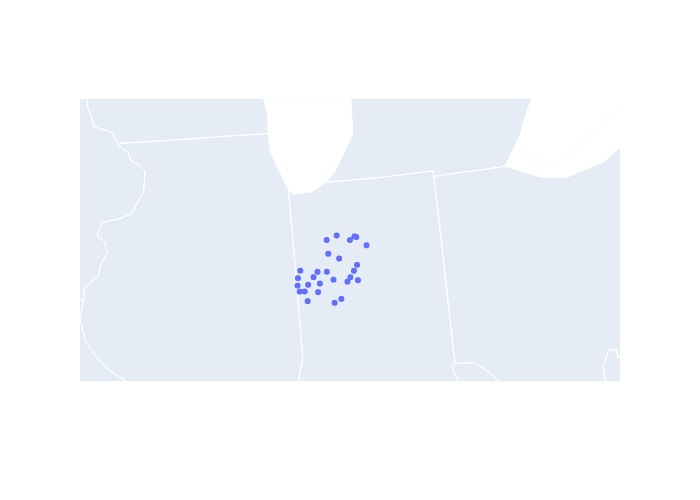

In [22]:
plot_stations(dat, weighted = False)

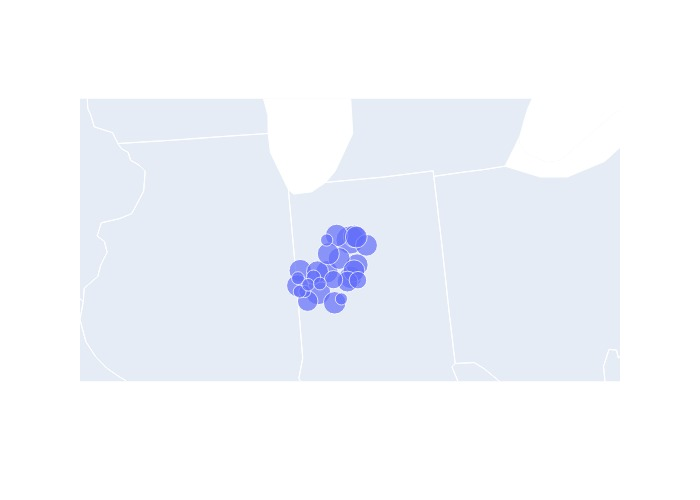

In [23]:
plot_stations(dat, weighted = True)

Plots are created with weighted and not weighted.

## Question 3

In [11]:
def plot_stations(df, weighted = False, weight_by = None):
    if weighted and weight_by:
        fig = px.scatter_geo(df.groupby(['station_id','latitude','longitude']).median().reset_index(), lat="latitude", lon="longitude", scope="usa",hover_name="station_id", size = f'{weight_by}')
        fig.update_layout(geo = dict(projection_scale=7, center=dict(lat=df['latitude'].iloc[0], lon=df['longitude'].iloc[0])))
    elif weighted and weight_by == None:
        fig = px.scatter_geo(df.groupby(['station_id','latitude','longitude']).count().reset_index(), lat="latitude", lon="longitude", scope="usa",hover_name="station_id", size = 'id')
        fig.update_layout(geo = dict(projection_scale=7, center=dict(lat=df['latitude'].iloc[0], lon=df['longitude'].iloc[0])))
    else:
        fig = px.scatter_geo(df.groupby('station_id').head(1), lat="latitude", lon="longitude", scope="usa",hover_name="station_id")
        fig.update_layout(geo = dict(projection_scale=7, center=dict(lat=df['latitude'].iloc[0], lon=df['longitude'].iloc[0])))
    fig.show(renderer="jpg")

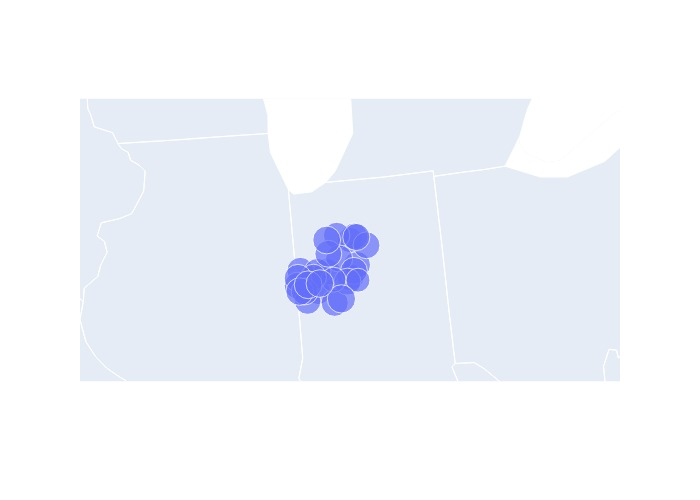

In [6]:
plot_stations(dat, weighted=True, weight_by="temperature_high")

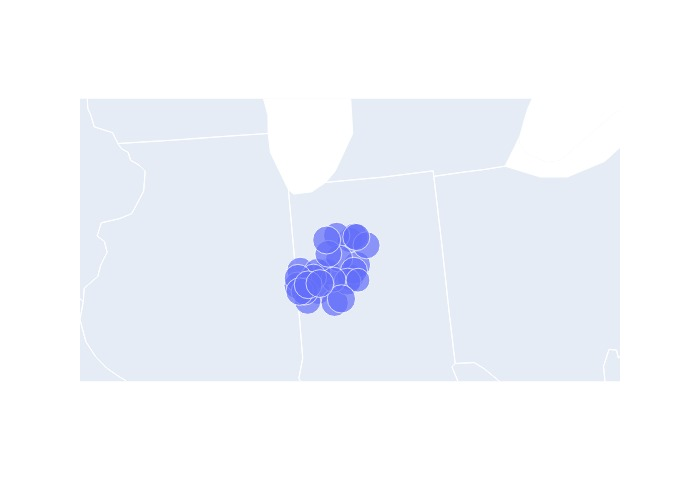

In [7]:
plot_stations(dat, weighted=True, weight_by="temperature_low")

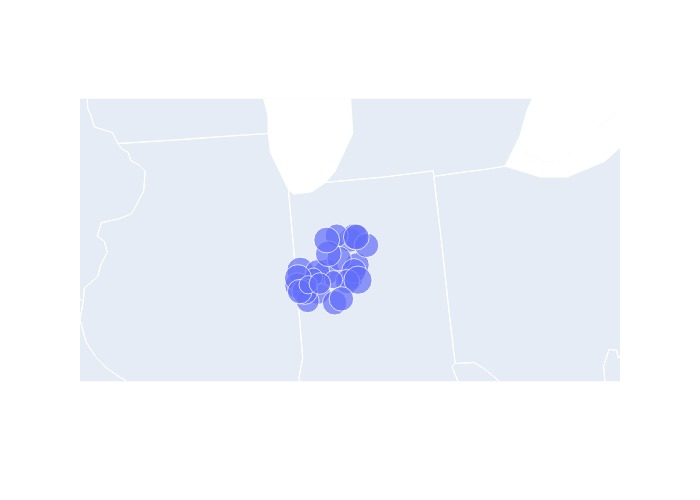

In [8]:
plot_stations(dat, weighted=True, weight_by="wind_speed_high")

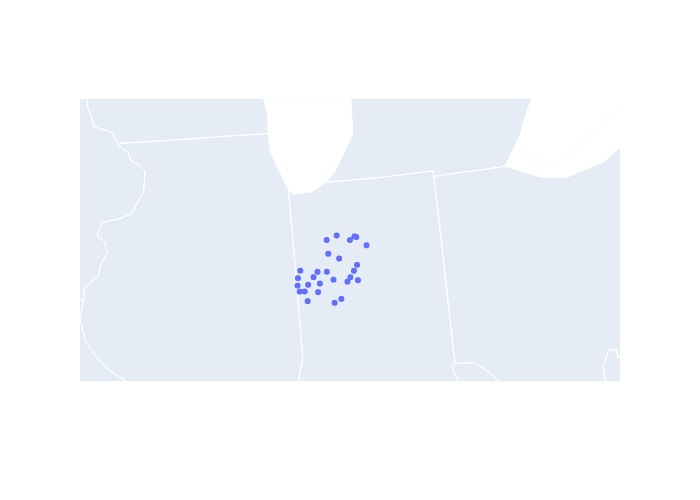

In [9]:
plot_stations(dat, weighted=False, weight_by="barometric_pressure")

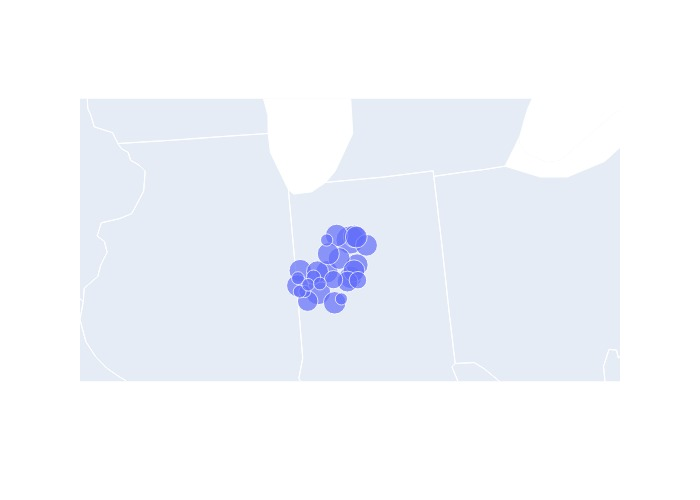

In [12]:
plot_stations(dat, weighted=True, weight_by=None)

All the plots are shown above.

## Question 4

In [42]:
my_df = pd.read_csv("depot/datamine/data/flights/subset/airports.csv")
my_df.head()

,iata,airport,city,state,country,lat,long
0,00M,Thigpen,Bay Springs,MS,USA,31.953765,-89.234505
1,00R,Livingston Municipal,Livingston,TX,USA,30.685861,-95.017928
2,00V,Meadow Lake,Colorado Springs,CO,USA,38.945749,-104.569893
3,01G,Perry-Warsaw,Perry,NY,USA,42.741347,-78.052081
4,01J,Hilliard Airpark,Hilliard,FL,USA,30.688012,-81.905944


In [56]:
def mapping(df, *states):
    df = df.groupby("airport").head(1).loc[df['state'].isin(states), :]
    figure = px.scatter_geo(df.groupby('state').head(1), lat = 'lat', lon = 'long', hover_name = 'state', scope = 'usa')
    #figure.update_layout(geo = dict(projection_scale=7, center=dict(lat=df['lat'].iloc[0], lon=df['long'].iloc[0])))
    figure.show(renderer = "jpg")

In [52]:
states = ('IN','IL','AK','CA','MS','TX')

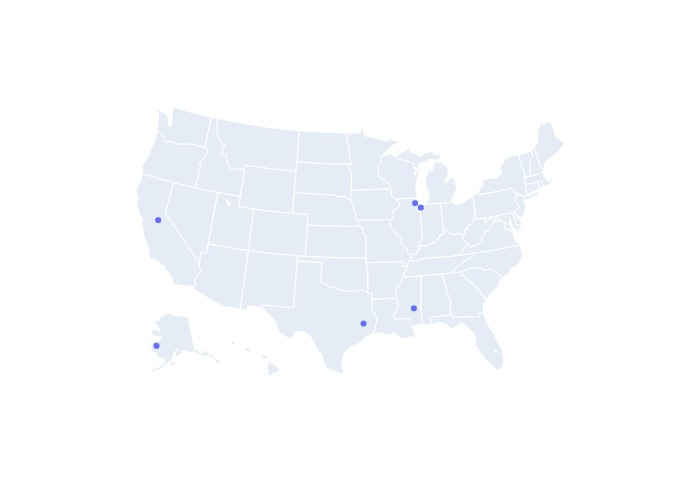

In [57]:
mapping(my_df, *states)

As above, I use packing and unpacking states and mark the airport in the selected states.

## Question 5

In [7]:
WHIN = pd.read_csv('depot/datamine/data/whin/weather.csv')
WHIN.head()

,station_id,latitude,longitude,name,observation_time,temperature,temperature_high,temperature_low,humidity,solar_radiation,...,wind_gust_direction_degrees,pressure,soil_temp_1,soil_temp_2,soil_temp_3,soil_temp_4,soil_moist_1,soil_moist_2,soil_moist_3,soil_moist_4
0,1,40.93894,-86.47418,WHIN001-PULA001,2019-07-10T04:00:00Z,70.0,71.0,70.0,83.0,NaN,...,247.5,30.05,77.0,78.0,76.0,74.0,24.0,24.0,10.0,9.0
1,1,40.93894,-86.47418,WHIN001-PULA001,2019-07-10T04:15:00Z,69.0,70.0,69.0,84.0,NaN,...,247.5,30.04,76.0,78.0,76.0,74.0,24.0,25.0,10.0,9.0
2,1,40.93894,-86.47418,WHIN001-PULA001,2019-07-11T04:00:00Z,76.0,77.0,76.0,76.0,NaN,...,202.5,29.89,80.0,80.0,78.0,75.0,31.0,30.0,12.0,10.0
3,1,40.93894,-86.47418,WHIN001-PULA001,2019-07-11T04:15:00Z,76.0,76.0,76.0,77.0,NaN,...,202.5,29.88,80.0,80.0,78.0,75.0,31.0,31.0,12.0,10.0
4,1,40.93894,-86.47418,WHIN001-PULA001,2019-07-11T04:30:00Z,76.0,76.0,76.0,77.0,NaN,...,202.5,29.88,80.0,80.0,78.0,75.0,32.0,31.0,12.0,10.0


In [8]:
WHIN = WHIN.drop_duplicates(subset = ["station_id"])
WHIN.head()

,station_id,latitude,longitude,name,observation_time,temperature,temperature_high,temperature_low,humidity,solar_radiation,...,wind_gust_direction_degrees,pressure,soil_temp_1,soil_temp_2,soil_temp_3,soil_temp_4,soil_moist_1,soil_moist_2,soil_moist_3,soil_moist_4
0,1,40.938940,-86.474180,WHIN001-PULA001,2019-07-10T04:00:00Z,70.0,71.0,70.0,83.0,NaN,...,247.5,30.050,77.0,78.0,76.0,74.0,24.0,24.0,10.0,9.0
71631,142,40.104830,-86.866190,WHIN052-MONT004,2020-04-09T16:30:00Z,48.0,48.0,48.0,43.0,906.0,...,292.5,29.019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
117026,143,40.982240,-86.385420,WHIN053-PULA005,2020-04-07T15:30:00Z,68.0,68.0,68.0,70.0,240.0,...,225.0,29.083,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
162619,151,40.844360,-86.181730,WHIN059-CASS006,2020-05-06T12:30:00Z,41.0,43.0,41.0,75.0,223.0,...,22.5,29.202,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
205425,20,40.270957,-87.148604,WHIN020-FOUN001,2019-08-21T15:00:00Z,NaN,NaN,NaN,NaN,NaN,...,NaN,30.020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [1]:
import numpy as np
def degrees_to_radians(value):
    return float(value * np.pi/180)

In [5]:
def get_distance(Ser1, Ser2):
    lat1 = degrees_to_radians(Ser1["latitude"])
    lat2 = degrees_to_radians(Ser2["latitude"])
    lon1 = degrees_to_radians(Ser1["longitude"])
    lon2 = degrees_to_radians(Ser2["longitude"])
    return 2*6367.4447*np.arcsin(np.sqrt(np.sin((lat2-lat1)/2)**2+np.cos(lat1)*np.cos(lat2)*np.sin((lon2-lon1)/2)**2))

In [9]:
location_list = []
for i in WHIN['station_id']:
    location = WHIN.loc[WHIN['station_id'] == i, :]
    location_list.append(location)


In [14]:
distance = []
for i in location_list:
    for j in location_list:
        distance.append(get_distance(i,j))

In [19]:
distance.sort(reverse=True)
distance[0:5]

[125.27871003472146,
 125.27871003472146,
 124.66202248002894,
 124.66202248002894,
 123.2803559501877]

I calculated the top distances but have trouble with that line_geo function. I have no idea what is that "location" or "projection". Since it is optional, I think I practiced what I want already!

## Pledge

By submitting this work I hereby pledge that this is my own, personal work. I've acknowledged in the designated place at the top of this file all sources that I used to complete said work, including but not limited to: online resources, books, and electronic communications. I've noted all collaboration with fellow students and/or TA's. I did not copy or plagiarize another's work.

> As a Boilermaker pursuing academic excellence, I pledge to be honest and true in all that I do. Accountable together – We are Purdue.